# US Market

## Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

In [3]:
pd.__version__

'1.1.3'

## Load Data and Cleanup

In [5]:
#df = pd.read_excel()

In [6]:
df = pd.read_excel(io='./data/multpl.xlsx',sheet_name='Mnthly',index_col='Date')

In [7]:
pd.options.display.max_rows = 20
df.dtypes

TenYrYld         float64
SPPE             float64
ShillSPPE        float64
SPYld            float64
UnempRate        float64
EmpPopRatio      float64
Inflation        float64
SPPriceOnDate    float64
SP1MoLater       float64
SP2MoLater       float64
SP3MoLater       float64
SP6MoLater       float64
SP12MoLater      float64
SP1MoG           float64
SP2MoG           float64
SP3MoG           float64
SP6MoG           float64
SP12MoG          float64
dtype: object

In [7]:
pd.options.display.max_rows = 10
df

,TenYrYld,SPPE,ShillSPPE,SPYld,UnempRate,EmpPopRatio,Inflation,SPPriceOnDate,SP1MoLater,SP2MoLater,SP3MoLater,SP6MoLater,SP12MoLater,SP1MoG,SP2MoG,SP3MoG,SP6MoG,SP12MoG
Date,,,,,,,,,,,,,,,,,,
1948-01-01,0.0244,9.04,10.42,0.0559,0.034,0.566,0.1023,14.83,14.10,14.30,15.40,16.42,15.36,-4.922454,-3.573837,3.843560,10.721510,3.573837
1948-02-01,0.0243,8.39,10.00,0.0566,0.038,0.567,0.0930,14.10,14.30,15.40,16.15,15.94,14.77,1.418440,9.219858,14.539007,13.049645,4.751773
1948-03-01,0.0242,8.36,10.19,0.0603,0.040,0.561,0.0685,14.30,15.40,16.15,16.82,15.76,14.91,7.692308,12.937063,17.622378,10.209790,4.265734
1948-04-01,0.0241,8.75,10.78,0.0594,0.039,0.567,0.0868,15.40,16.15,16.82,16.42,16.19,14.89,4.870130,9.220779,6.623377,5.129870,-3.311688
1948-05-01,0.0240,8.92,11.24,0.0552,0.035,0.562,0.0913,16.15,16.82,16.42,15.94,15.29,14.78,4.148607,1.671827,-1.300310,-5.325077,-8.482972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-01,0.0284,23.41,30.58,0.0184,0.041,0.604,0.0646,2702.77,2653.63,2701.49,2754.35,NaN,NaN,-1.818135,-0.047359,1.908412,NaN,NaN
2018-04-01,0.0286,22.99,30.98,0.0185,0.039,0.603,0.0246,2653.63,2701.49,2754.35,2736.61,NaN,NaN,1.803567,3.795556,3.127037,NaN,NaN
2018-05-01,0.0298,23.40,31.41,0.0190,0.038,0.604,0.0280,2701.49,2754.35,2736.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.dropna(inplace=True)

if df.EmpPopRatio[0] < 1:
    df.TenYrYld = 100 * df.TenYrYld
    df.SPYld = 100 * df.SPYld
    df.UnempRate = 100 * df.UnempRate
    df.EmpPopRatio = 100 * df.EmpPopRatio
    df.Inflation = 100 * df.Inflation 

In [9]:
df

,TenYrYld,SPPE,ShillSPPE,SPYld,UnempRate,EmpPopRatio,Inflation,SPPriceOnDate,SP1MoLater,SP2MoLater,SP3MoLater,SP6MoLater,SP12MoLater,SP1MoG,SP2MoG,SP3MoG,SP6MoG,SP12MoG
Date,,,,,,,,,,,,,,,,,,
1948-01-01,2.44,9.04,10.42,5.59,3.4,56.6,10.23,14.83,14.10,14.30,15.40,16.42,15.36,-4.922454,-3.573837,3.843560,10.721510,3.573837
1948-02-01,2.43,8.39,10.00,5.66,3.8,56.7,9.30,14.10,14.30,15.40,16.15,15.94,14.77,1.418440,9.219858,14.539007,13.049645,4.751773
1948-03-01,2.42,8.36,10.19,6.03,4.0,56.1,6.85,14.30,15.40,16.15,16.82,15.76,14.91,7.692308,12.937063,17.622378,10.209790,4.265734
1948-04-01,2.41,8.75,10.78,5.94,3.9,56.7,8.68,15.40,16.15,16.82,16.42,16.19,14.89,4.870130,9.220779,6.623377,5.129870,-3.311688
1948-05-01,2.40,8.92,11.24,5.52,3.5,56.2,9.13,16.15,16.82,16.42,15.94,15.29,14.78,4.148607,1.671827,-1.300310,-5.325077,-8.482972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-03-01,2.48,23.60,29.09,1.98,4.5,60.2,2.38,2366.82,2359.31,2395.35,2433.99,2492.84,2702.77,-0.317303,1.205415,2.837985,5.324444,14.194151
2017-04-01,2.18,23.24,28.90,1.96,4.4,60.2,2.20,2359.31,2395.35,2433.99,2454.10,2557.00,2653.63,1.527565,3.165332,4.017700,8.379145,12.474834
2017-05-01,2.30,23.31,29.31,1.98,4.3,60.0,1.87,2395.35,2433.99,2454.10,2456.22,2593.61,2701.49,1.613125,2.452669,2.541174,8.276870,12.780596


## Analyze

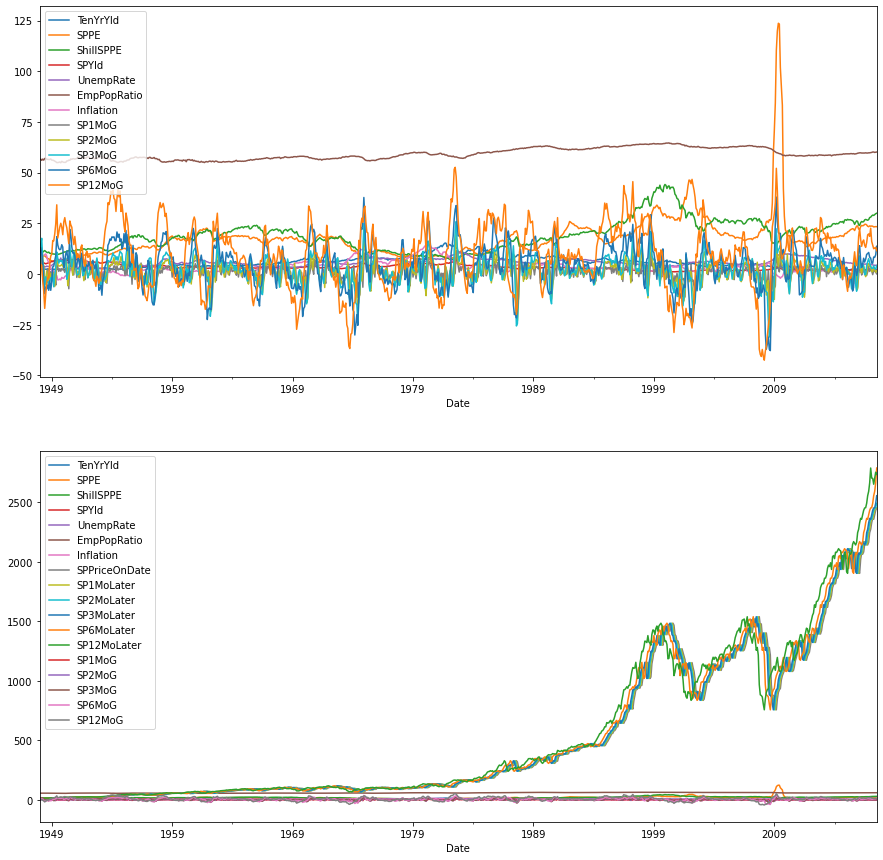

In [10]:
dfp = df.drop(['SPPriceOnDate','SP1MoLater','SP2MoLater','SP3MoLater','SP6MoLater','SP12MoLater'],axis=1)
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15,15))
dfp.plot(ax=ax[0])
ax[0].legend(loc='upper left')
plt.xlim=(1945,2020)
df.plot(ax=ax[1])
ax[1].legend(loc='upper left')
plt.xlim=(1945,2020)
plt.show()

In [11]:
df.describe()

,TenYrYld,SPPE,ShillSPPE,SPYld,UnempRate,EmpPopRatio,Inflation,SPPriceOnDate,SP1MoLater,SP2MoLater,SP3MoLater,SP6MoLater,SP12MoLater,SP1MoG,SP2MoG,SP3MoG,SP6MoG,SP12MoG
count,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000
mean,5.632922,17.669413,18.927820,3.345066,5.799401,59.220000,3.532036,509.297449,512.221269,515.189820,518.234970,527.815066,547.167425,0.673502,1.386410,2.105294,4.305816,8.857006
std,2.874665,11.247160,7.562296,1.415429,1.634890,2.771968,2.948603,606.103585,609.593968,613.190125,617.001462,629.734921,654.629209,3.433691,5.382663,6.809684,10.425155,15.581087
min,1.500000,5.820000,6.640000,1.110000,2.500000,54.900000,-2.870000,13.970000,13.970000,13.970000,13.970000,13.970000,13.970000,-20.391142,-27.438268,-31.091637,-37.784625,-42.508391
25%,3.410000,11.740000,12.460000,2.100000,4.700000,57.000000,1.620000,80.020000,80.170000,80.445000,80.685000,81.665000,84.120000,-1.060222,-1.577692,-1.579368,-2.190055,-0.827919
50%,5.010000,16.730000,18.350000,3.140000,5.600000,58.600000,2.900000,135.700000,138.100000,139.400000,144.300000,151.900000,157.700000,0.954198,1.758708,2.484472,4.814214,10.060362
75%,7.400000,19.520000,23.240000,4.170000,6.900000,62.000000,4.510000,1011.875000,1016.730000,1020.040000,1022.190000,1041.640000,1076.710000,2.848554,5.046724,6.431378,10.450495,19.625546
max,15.320000,123.730000,44.190000,7.440000,10.800000,64.700000,14.760000,2454.100000,2456.220000,2492.840000,2557.000000,2789.800000,2789.800000,12.021714,20.966272,25.888788,37.961777,52.650823


In [12]:
correlation = df.corr().round(2)

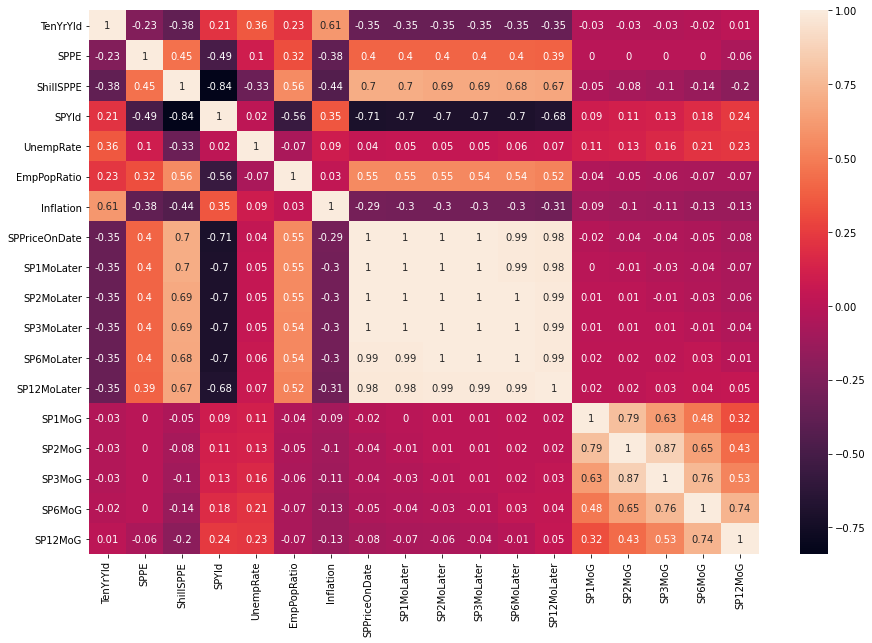

In [13]:
_, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data=correlation,annot=True,ax=ax)
plt.show()

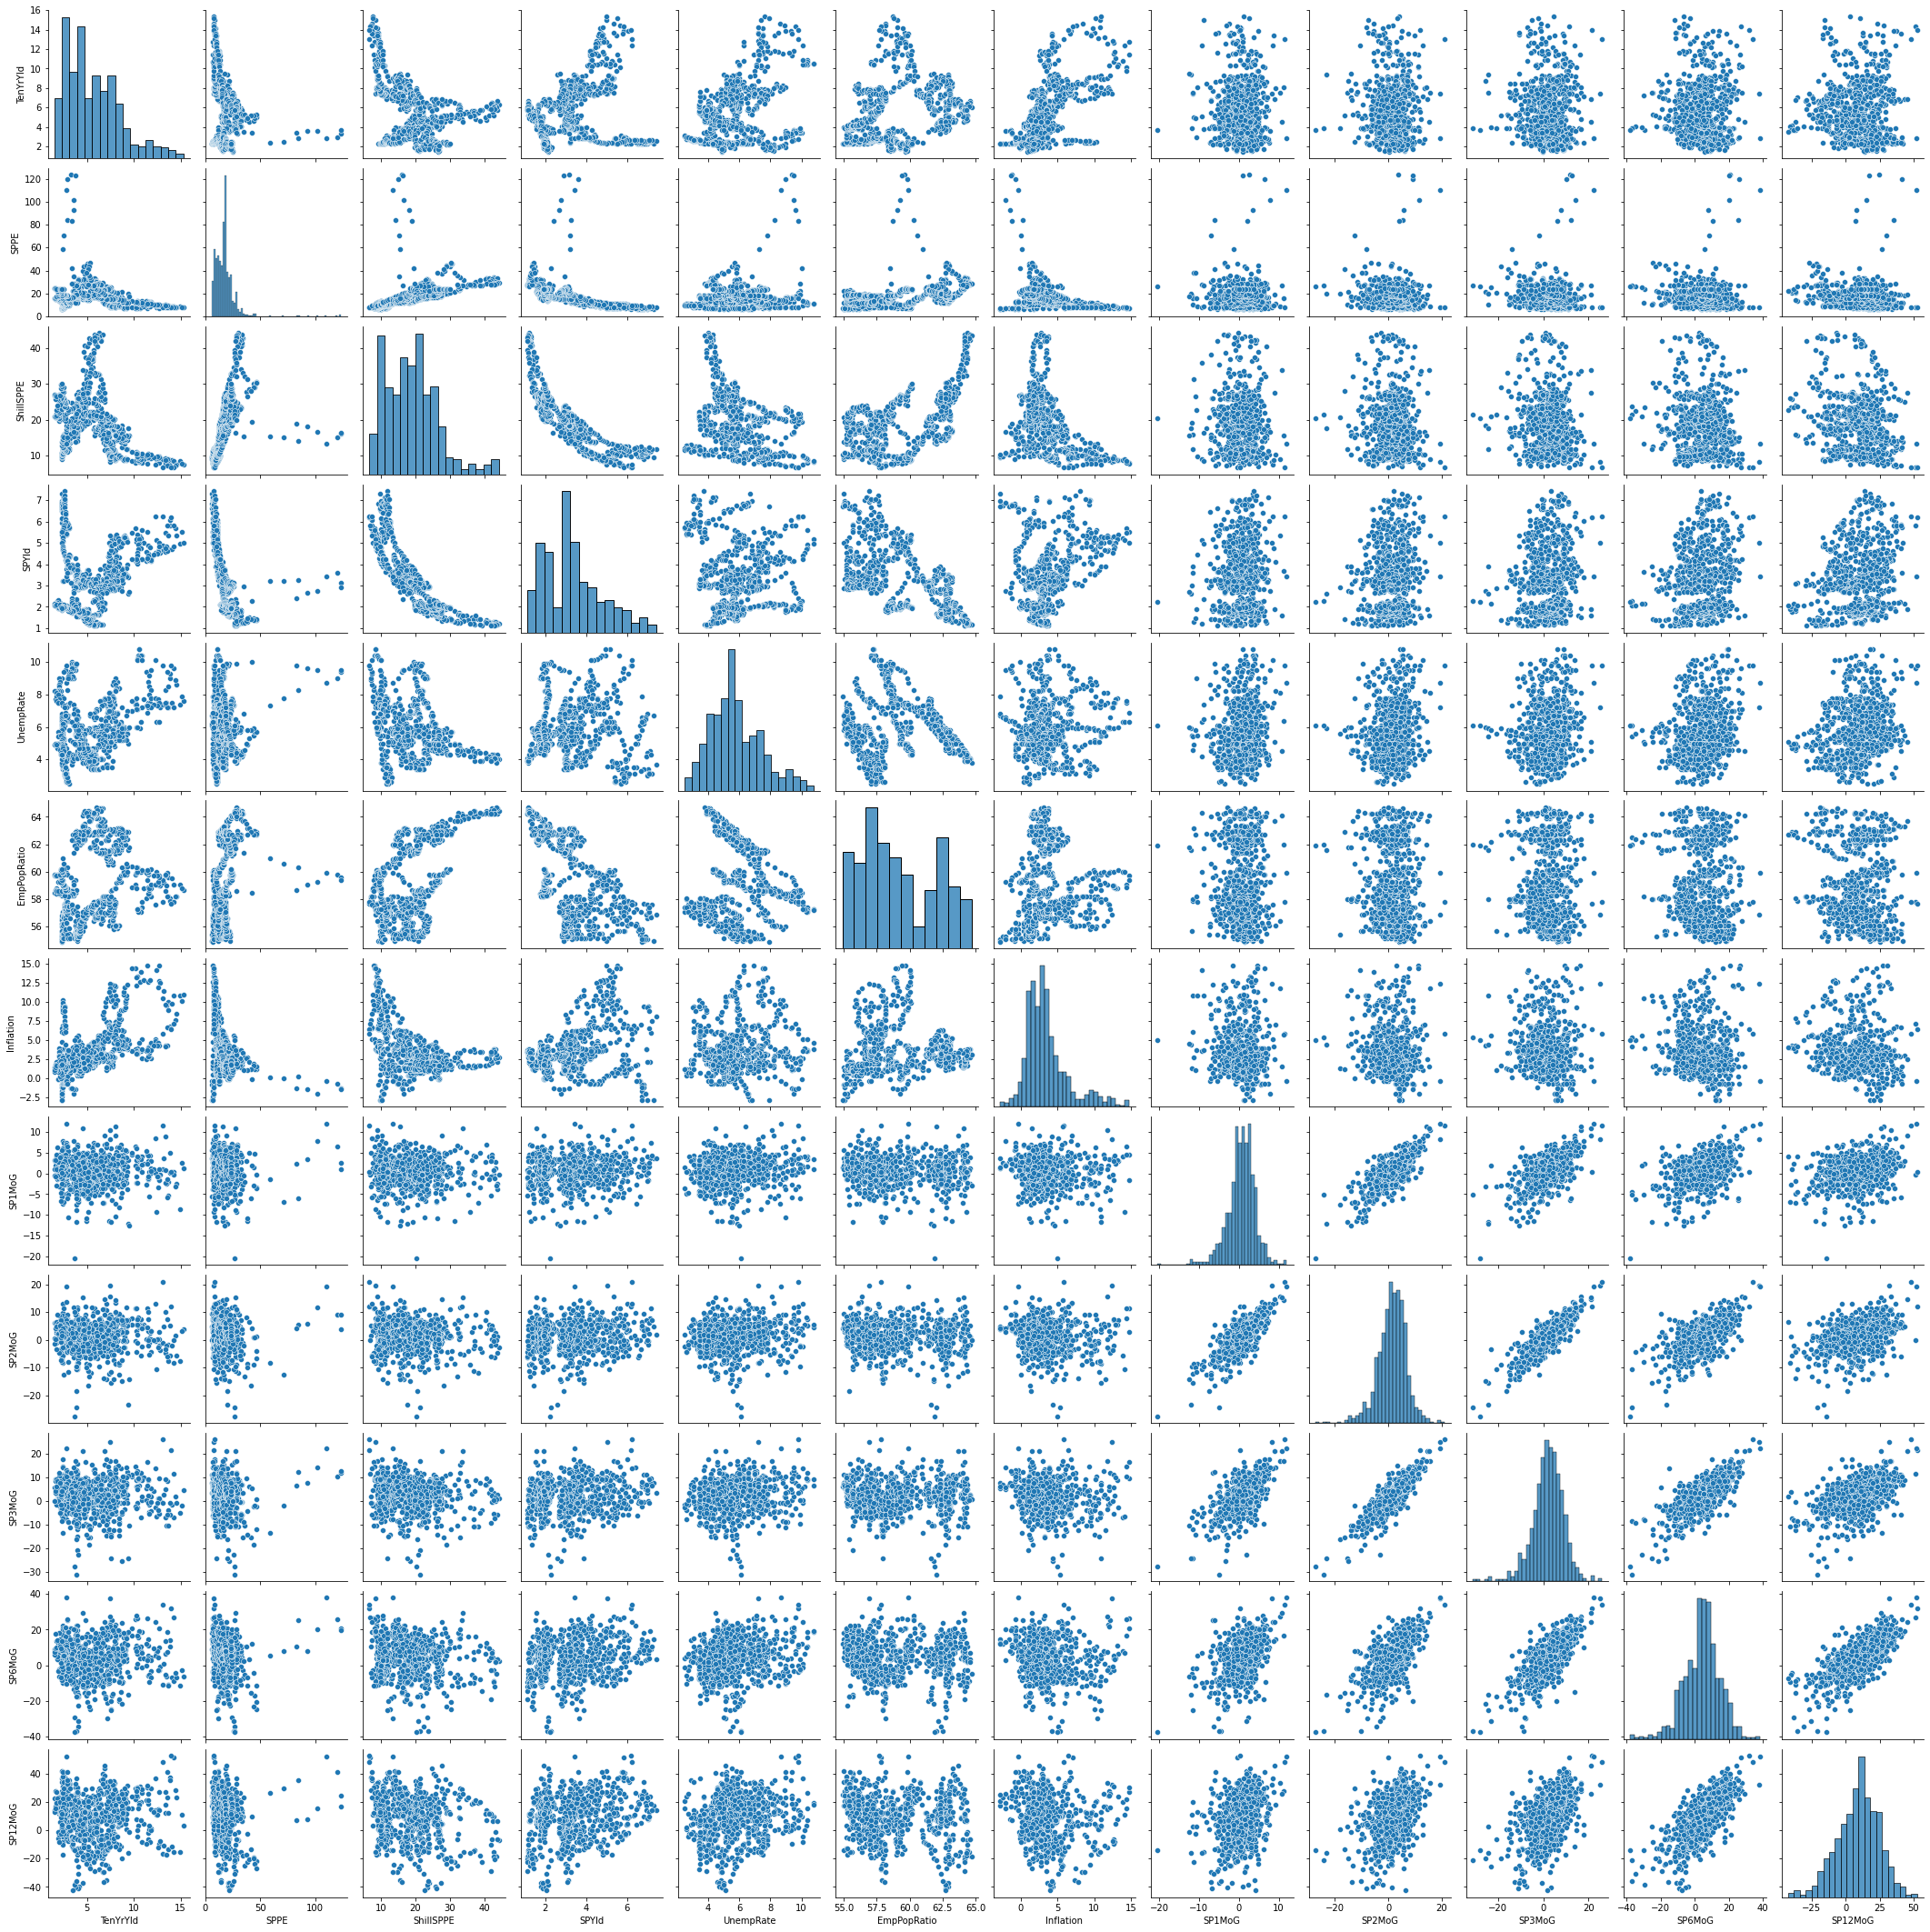

In [14]:
sns.pairplot(dfp)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

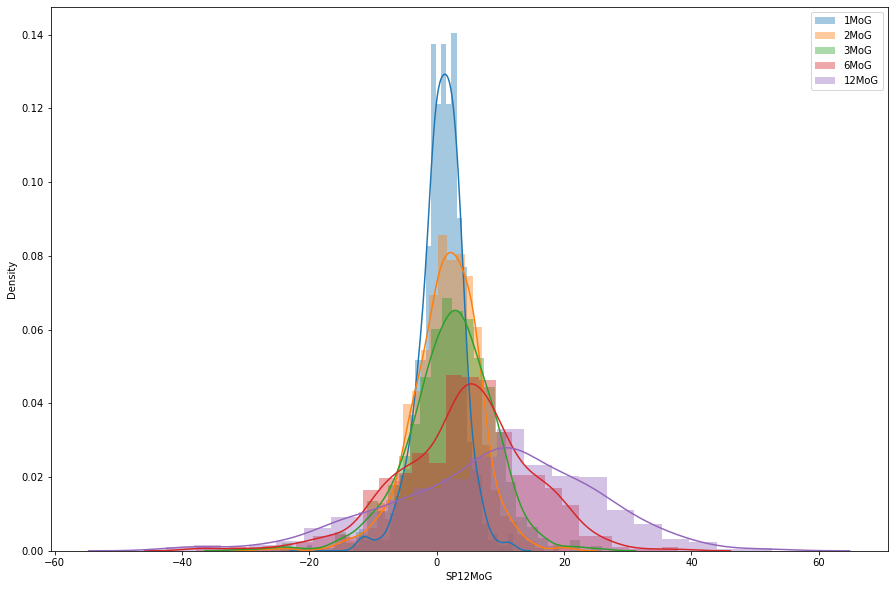

In [15]:
_ = plt.subplots(figsize=(15,10))
sns.distplot(df.SP1MoG,label='1MoG')
sns.distplot(df.SP2MoG,label='2MoG')
sns.distplot(df.SP3MoG,label='3MoG')
sns.distplot(df.SP6MoG,label='6MoG')
sns.distplot(df.SP12MoG,label='12MoG')
plt.legend()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


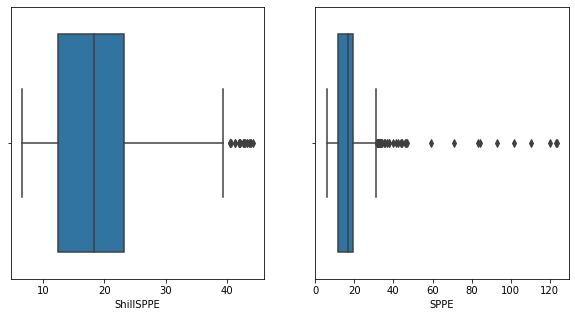

In [16]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.boxplot(df.ShillSPPE,ax=ax[0])
sns.boxplot(df.SPPE,ax=ax[1])
plt.show()

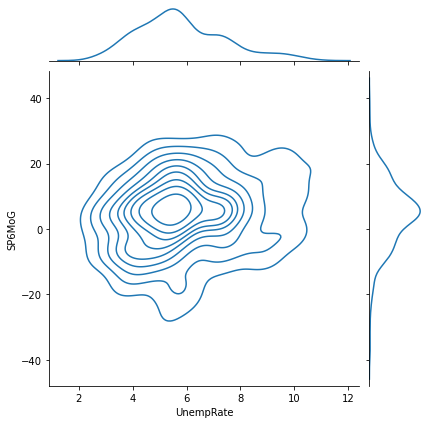

In [17]:
sns.jointplot(x='UnempRate',y='SP6MoG',data=df,kind='kde')
plt.show()

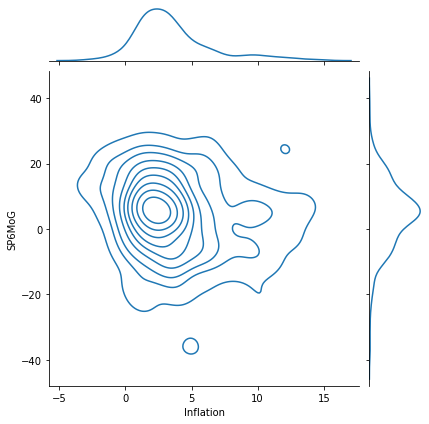

In [18]:
sns.jointplot(x='Inflation',y='SP6MoG',data=df,kind='kde')
plt.show()

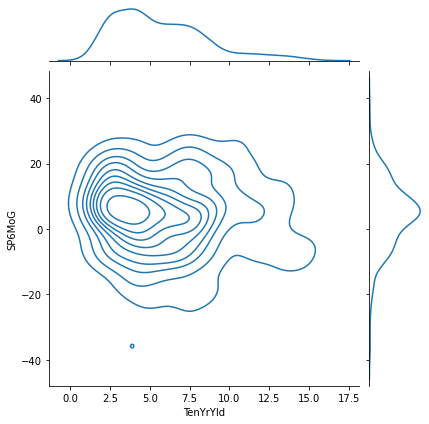

In [19]:
sns.jointplot(x='TenYrYld',y='SP6MoG',data=df,kind='kde')
plt.show()

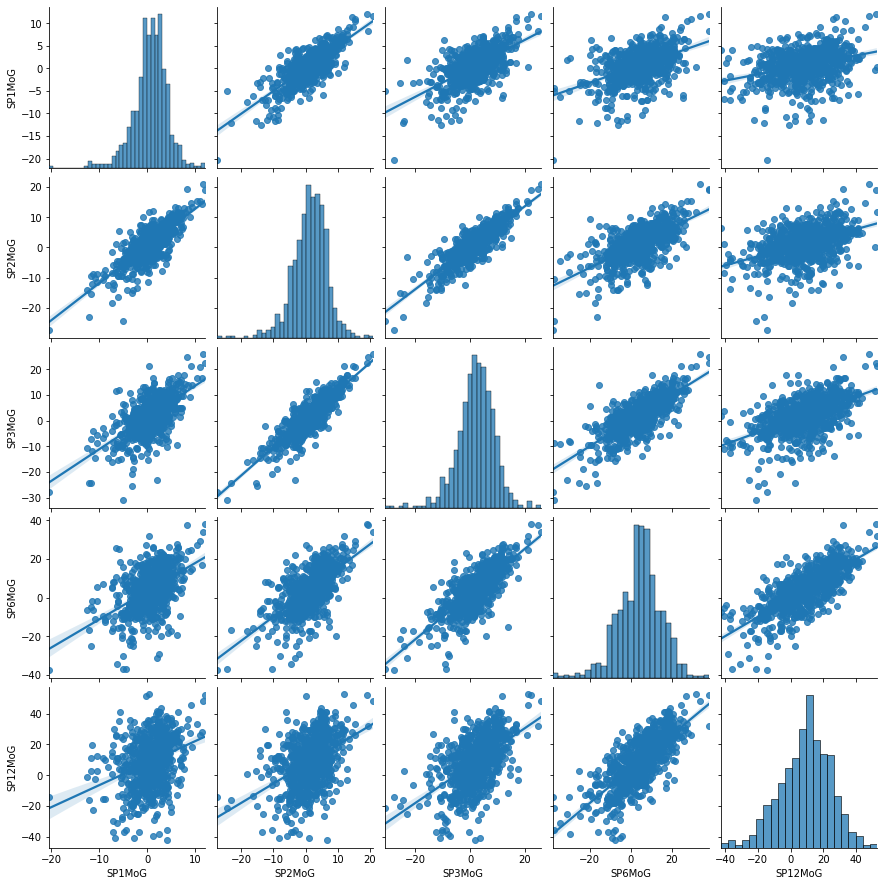

In [20]:
dfs = df[['SP1MoG','SP2MoG','SP3MoG','SP6MoG','SP12MoG']]
sns.pairplot(dfs,kind='reg')
plt.show()

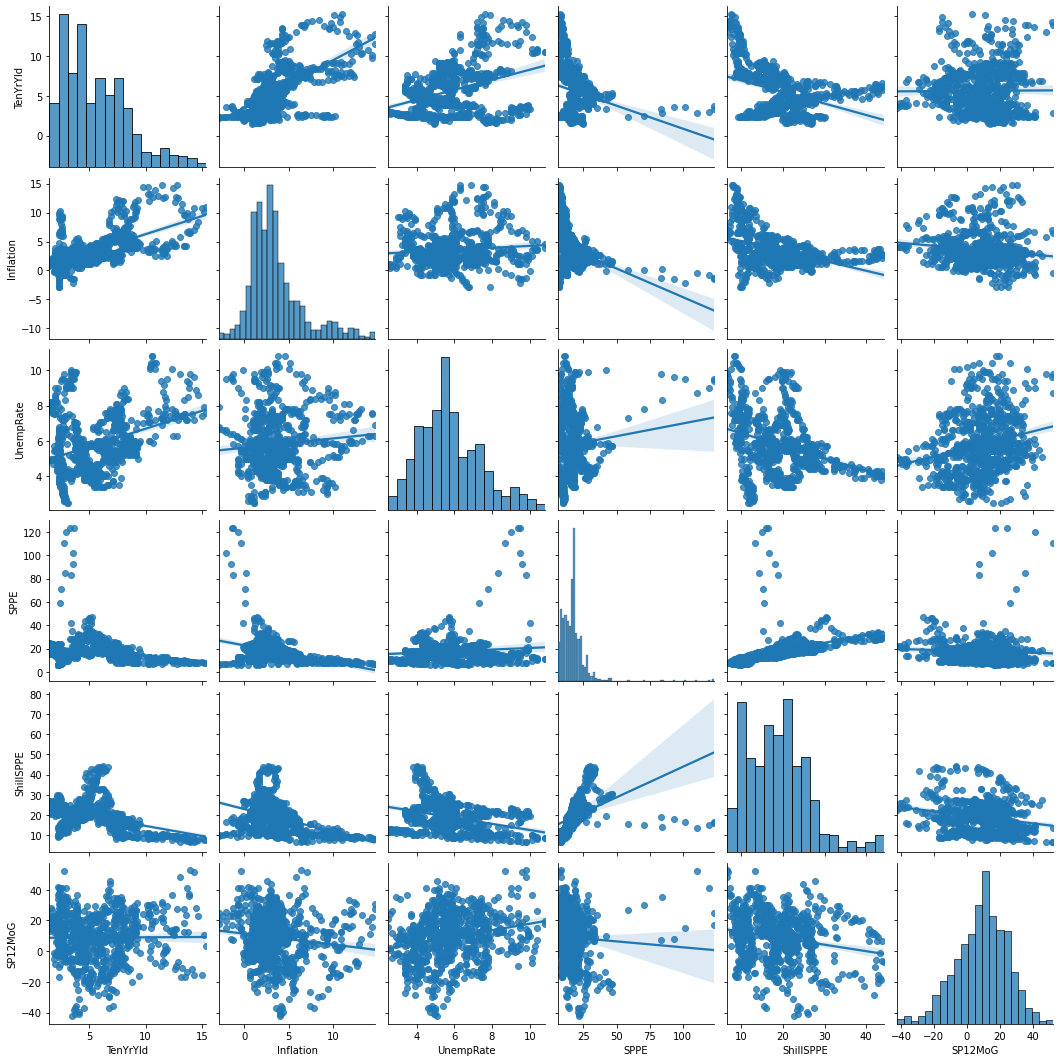

In [21]:
dfs = df[['TenYrYld','Inflation','UnempRate','SPPE','ShillSPPE','SP12MoG']]
sns.pairplot(dfs,kind='reg')
plt.show()

## Supervised

### Predict using economic data

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

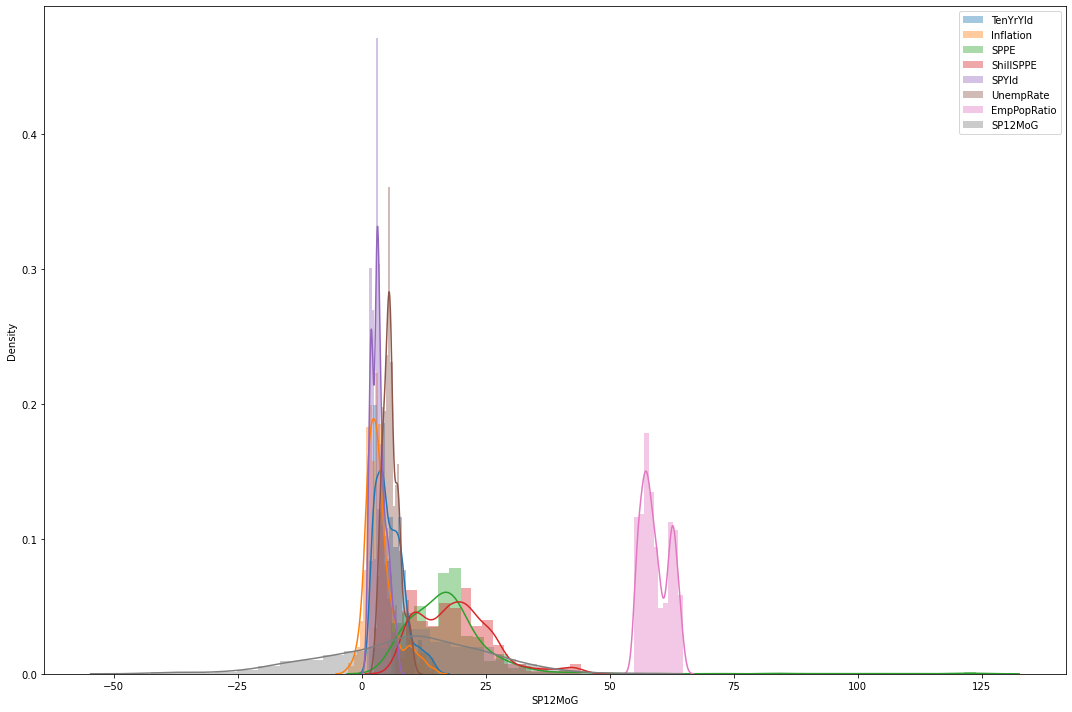

In [22]:
_ = plt.subplots(figsize=(15,10))
sns.distplot(df.TenYrYld,label=df.TenYrYld.name)
sns.distplot(df.Inflation,label=df.Inflation.name)
sns.distplot(df.SPPE,label=df.SPPE.name)
sns.distplot(df.ShillSPPE,label=df.ShillSPPE.name)
sns.distplot(df.SPYld,label=df.SPYld.name)
sns.distplot(df.UnempRate,label=df.UnempRate.name)
sns.distplot(df.EmpPopRatio,label=df.EmpPopRatio.name)
sns.distplot(df.SP12MoG,label=df.SP12MoG.name)
plt.legend()
plt.tight_layout()
plt.show()

In [23]:
X = df.iloc[:,0:7]
y = df.SP12MoG

In [24]:
X

,TenYrYld,SPPE,ShillSPPE,SPYld,UnempRate,EmpPopRatio,Inflation
Date,,,,,,,
1948-01-01,2.44,9.04,10.42,5.59,3.4,56.6,10.23
1948-02-01,2.43,8.39,10.00,5.66,3.8,56.7,9.30
1948-03-01,2.42,8.36,10.19,6.03,4.0,56.1,6.85
1948-04-01,2.41,8.75,10.78,5.94,3.9,56.7,8.68
1948-05-01,2.40,8.92,11.24,5.52,3.5,56.2,9.13
...,...,...,...,...,...,...,...
2017-03-01,2.48,23.60,29.09,1.98,4.5,60.2,2.38
2017-04-01,2.18,23.24,28.90,1.96,4.4,60.2,2.20
2017-05-01,2.30,23.31,29.31,1.98,4.3,60.0,1.87


In [25]:
y

Date
1948-01-01     3.573837
1948-02-01     4.751773
1948-03-01     4.265734
1948-04-01    -3.311688
1948-05-01    -8.482972
                ...    
2017-03-01    14.194151
2017-04-01    12.474834
2017-05-01    12.780596
2017-06-01    13.161928
2017-07-01    11.511756
Name: SP12MoG, Length: 835, dtype: float64

In [26]:
from sklearn import preprocessing, metrics
from sklearn import model_selection, svm
from sklearn.ensemble import GradientBoostingRegressor

In [27]:
Xtrain, Xtest, ytrain, ytest = model_selection.train_test_split(X,y,test_size=0.1,random_state=0)

In [28]:
Xtrain.shape, ytrain.shape, Xtest.shape, ytest.shape

((751, 7), (751,), (84, 7), (84,))

In [29]:
SS = preprocessing.StandardScaler()
SS.fit_transform(Xtrain)
SS.fit_transform(Xtest)

array([[-6.29083599e-01, -1.62777474e-01,  1.51001266e-01,
        -8.40580862e-01,  2.44100627e+00, -3.43564709e-01,
        -3.47751635e-01],
       [-2.88604427e-01,  2.26492332e-01,  1.43627191e+00,
        -1.31565508e+00, -9.33220439e-01,  1.58729359e+00,
        -1.18247610e-01],
       [-1.08087327e+00, -8.26018556e-01, -1.16359115e+00,
         2.86783433e+00, -8.12712342e-01, -9.98677345e-01,
        -3.95002464e-01],
       [-7.14203392e-01,  3.89682895e+00, -3.02264333e-01,
        -2.94600041e-01,  2.26024412e+00, -2.05646260e-01,
        -1.60327366e+00],
       [ 2.56945632e+00, -7.62329843e-01, -1.63396111e+00,
         1.92477654e+00,  2.13973603e+00, -5.15962772e-01,
         1.15077465e+00],
       [-1.17581458e+00,  6.94667121e-02,  1.01843678e+00,
        -7.98036902e-01, -8.72966391e-01,  1.73629477e-01,
        -3.61251872e-01],
       [-1.11033781e+00, -5.99813816e-01, -8.80147429e-01,
         1.41424902e+00, -1.49917811e-01, -1.55035114e+00,
        -9.7888770

In [30]:
#model = svm.SVR(kernel='rbf')
model  = GradientBoostingRegressor()

In [31]:
model.fit(Xtrain,ytrain)

GradientBoostingRegressor()

In [32]:
ypredict = model.predict(Xtrain)

In [33]:
metrics.explained_variance_score(y_pred=ypredict,y_true=ytrain).round(3),\
metrics.mean_squared_error(y_pred=ypredict,y_true=ytrain).round(3),\
metrics.r2_score(y_pred=ypredict,y_true=ytrain).round(3)

(0.853, 35.264, 0.853)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


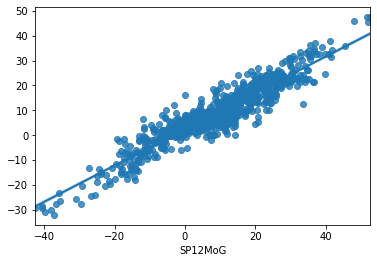

In [34]:
sns.regplot(ytrain,ypredict)
plt.show()

In [35]:
ypredict1 = model.predict(Xtest)

In [36]:
metrics.explained_variance_score(y_pred=ypredict1,y_true=ytest).round(3),\
metrics.mean_squared_error(y_pred=ypredict1,y_true=ytest).round(3),\
metrics.r2_score(y_pred=ypredict1,y_true=ytest).round(3)

(0.751, 66.236, 0.749)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


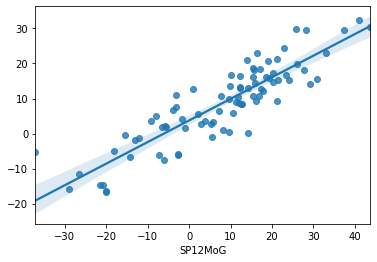

In [37]:
sns.regplot(ytest,ypredict1)
plt.show()

## Predict using other monthly returns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

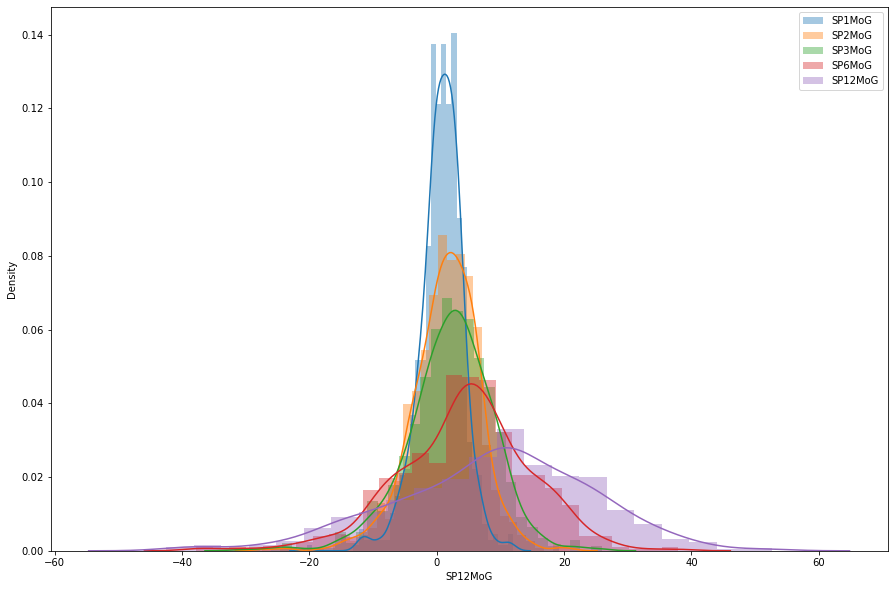

In [38]:
_ = plt.subplots(figsize=(15,10))
sns.distplot(df.SP1MoG,label=df.SP1MoG.name)
sns.distplot(df.SP2MoG,label=df.SP2MoG.name)
sns.distplot(df.SP3MoG,label=df.SP3MoG.name)
sns.distplot(df.SP6MoG,label=df.SP6MoG.name)
sns.distplot(df.SP12MoG,label=df.SP12MoG.name)
plt.legend()
plt.show()

In [39]:
X = df.iloc[:,-5:-1]
y = df.SP12MoG

In [40]:
X

,SP1MoG,SP2MoG,SP3MoG,SP6MoG
Date,,,,
1948-01-01,-4.922454,-3.573837,3.843560,10.721510
1948-02-01,1.418440,9.219858,14.539007,13.049645
1948-03-01,7.692308,12.937063,17.622378,10.209790
1948-04-01,4.870130,9.220779,6.623377,5.129870
1948-05-01,4.148607,1.671827,-1.300310,-5.325077
...,...,...,...,...
2017-03-01,-0.317303,1.205415,2.837985,5.324444
2017-04-01,1.527565,3.165332,4.017700,8.379145
2017-05-01,1.613125,2.452669,2.541174,8.276870


In [41]:
y

Date
1948-01-01     3.573837
1948-02-01     4.751773
1948-03-01     4.265734
1948-04-01    -3.311688
1948-05-01    -8.482972
                ...    
2017-03-01    14.194151
2017-04-01    12.474834
2017-05-01    12.780596
2017-06-01    13.161928
2017-07-01    11.511756
Name: SP12MoG, Length: 835, dtype: float64

In [42]:
from sklearn import preprocessing, metrics
from sklearn import model_selection, svm
from sklearn.ensemble import GradientBoostingRegressor

In [43]:
Xtrain, Xtest, ytrain, ytest = model_selection.train_test_split(X,y,test_size=0.1,random_state=0)

In [44]:
Xtrain.shape, ytrain.shape, Xtest.shape, ytest.shape

((751, 4), (751,), (84, 4), (84,))

In [45]:
SS = preprocessing.StandardScaler()
SS.fit_transform(Xtrain)
SS.fit_transform(Xtest)

array([[-1.80542182e+00, -1.88681145e+00, -1.44087279e+00,
        -4.87675958e-01],
       [-8.92425569e-02,  1.03047310e+00,  4.88095244e-01,
        -1.41429136e+00],
       [ 7.70081911e-01,  1.15069755e+00,  9.12296399e-01,
         1.55586744e+00],
       [ 7.48961881e-01,  7.86824260e-01,  9.34217604e-01,
         4.63452746e-01],
       [-1.73023842e+00, -1.27266312e+00, -8.92267333e-01,
         1.48673960e+00],
       [ 2.31576892e-01,  3.36078187e-01,  4.28647990e-01,
         5.12136563e-01],
       [ 9.08310310e-01,  8.52495048e-01,  1.04768350e+00,
         1.68711627e+00],
       [-3.02632237e-01,  3.84092399e-03, -3.51453924e-02,
        -8.36900329e-01],
       [ 5.38447253e-01,  4.31851402e-01,  2.01821187e-01,
         1.81483908e-01],
       [-8.05093666e-01, -2.87346280e-01, -3.49213042e-02,
        -6.03212992e-02],
       [ 5.55026085e-01, -7.41354974e-01, -6.03146469e-01,
        -7.95683208e-01],
       [-4.19207670e-01, -9.22485828e-01,  2.36695089e-01,
      

In [46]:
#model = svm.SVR(kernel='rbf')
model = GradientBoostingRegressor()

In [47]:
model.fit(Xtrain,ytrain)

GradientBoostingRegressor()

In [48]:
ypredict = model.predict(Xtrain)

In [49]:
metrics.explained_variance_score(y_pred=ypredict,y_true=ytrain).round(3),\
metrics.mean_squared_error(y_pred=ypredict,y_true=ytrain).round(3),\
metrics.r2_score(y_pred=ypredict,y_true=ytrain).round(3)

(0.758, 58.193, 0.758)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SP12MoG'>

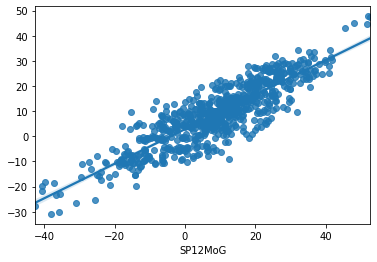

In [50]:
sns.regplot(ytrain,ypredict)

In [51]:
ypredict1 = model.predict(Xtest)

In [52]:
metrics.explained_variance_score(y_pred=ypredict1,y_true=ytest).round(3),\
metrics.mean_squared_error(y_pred=ypredict1,y_true=ytest).round(3),\
metrics.r2_score(y_pred=ypredict1,y_true=ytest).round(3)

(0.58, 110.904, 0.579)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


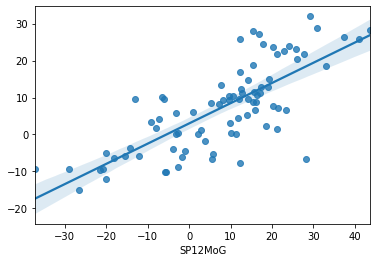

In [53]:
sns.regplot(ytest,ypredict1)
plt.show()